# Kinetic Parameters Calculation for OH-CH<sub>3</sub>OH Gas-Phase Reaction

In [4]:
# import libraries
import numpy as np
import pandas as pd
import math
import copy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Scientific Background

### Overview

This project focuses on calculating the kinetic parameters of the OH-CH<sub>3</sub>OH gas-phase reaction using an extended version of the Arrhenius equation known as the Kooij's equation. The Kooij's equation provides a more accurate representation of the temperature dependence of reaction rates, particularly over a wide temperature range.

### Arrhenius Equation
The Arrhenius equation is a fundamental formula in chemical kinetics that describes the temperature dependence of reaction rates:

> <div align="center"><em>k = A exp(-B/T) </em></div>

where:
* *k* is the rate constant at temperature *T*,
* *A* is the pre-exponential factor, representing the rate of molecular collisions with the correct orientation for reaction,
* *E* is the activation energy,
* *R* is the universal gas constant.

The exponential term represents the fraction of collisions with sufficient energy for the reaction to occur.

### Extended Arrhenius Equation (Kooij's Equation)

Over limited temperature ranges, the Arrhenius equation adequately describes the temperature dependence of bimolecular reactions. However, over extended temperature ranges, many reactions exhibit curved Arrhenius plots due to multiple reaction pathways, formation of pre-reactive complexes, quantum tunneling at low temperatures, and other factors.

To account for this curvature, we use the Kooij's equation, also known as the "extended" Arrhenius expression:

> <div align="center"><em>k = A exp(-B/T)(T/300)<sup>n</sup></em></div>

where:
* *B* = E/R
* *n* is an additional parameter adjusted to fit the data.

### Linear Kooij's Equation

The Kooij's Equation can be transformed into a linear form, *y = wx + b*:

> <div align="center"><em>ln(k/T<sup>n</sup>) = -B(1/T) + ln(A/300<sup>n</sup>)</em></div>

where:
* *y = ln(k/T<sup>n</sup>)*
* *w = -B, slope*
* *x = 1/T*
* *b = ln(A/300<sup>n</sup>), intercept*

## Data Preparation and Visualization

For simplicity, *n* is already given as 2.72 based on the data of the reaction. The objective of this project is to find the kinetic parameters *A* and *B*. Note that data at temperatures greater than 1344<sup>o</sup>C were excluded due to a high %error in the manually fitted parameters from the paper.

In [ ]:
data=pd.read_csv('OH-methanol_kT_data_csv.csv')
data

,"Temperature, T (Kelvin)","Rate constant, k (cm^3 mol^-1 s^-1)",1/T,ln(k/(T^2.72))
0,240.0,6.570000e-13,0.004167,-42.958430
1,296.0,8.610000e-13,0.003378,-43.258460
2,350.0,1.250000e-12,0.002857,-43.341456
3,400.0,1.410000e-12,0.002500,-43.584215
4,440.0,1.620000e-12,0.002273,-43.704622
...,...,...,...,...
86,465.0,1.350000e-12,0.002151,-44.037258
87,570.0,2.060000e-12,0.001754,-44.168446
88,597.0,2.670000e-12,0.001675,-44.034957
89,669.0,2.790000e-12,0.001495,-44.300712


In [6]:
# load feature variable x and target variable y
X_series = data.iloc[:,2]
y_series = data.iloc[:,3]
X = np.array(X_series)
y = np.array(y_series)

# show variable shapes
print(f'X.shape {X.shape}   y.shape {y.shape}')

X.shape (91,)   y.shape (91,)


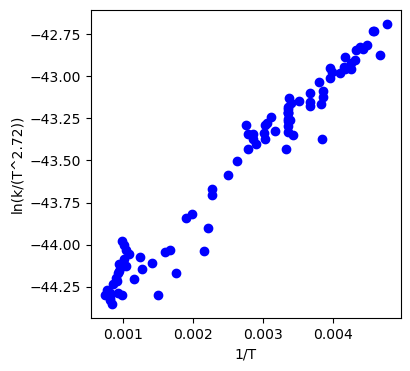

In [7]:
# plot data
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('1/T')
ax.set_ylabel('ln(k/(T^2.72))')
ax.scatter(X,y,color = 'blue')
plt.show()

## Linear Regression using Sklearn library

In [8]:
# Linear Regression model
model = LinearRegression()

# convert X to a 2-D matrix
model.fit(X.reshape(-1,1),y)

LinearRegression()

In [9]:
# print parameters
w = model.coef_
b = model.intercept_
print(f'slope = {w}, intercept = {b}')

slope = [396.29602168], intercept = -44.58845794879121


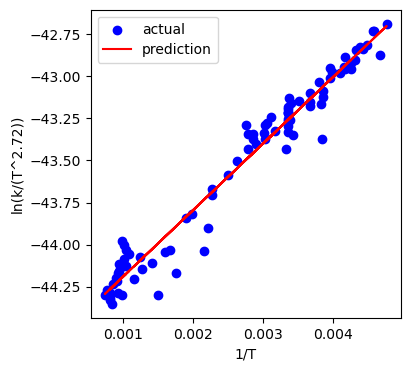

In [10]:
# make predictions
y_pred = w*X + b

# plot results
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_xlabel('1/T')
ax.set_ylabel('ln(k/(T^2.72))')
ax.scatter(X,y,color = 'blue', label='actual')
ax.plot(X,y_pred, color='red', label='prediction')
ax.legend(loc='upper left')
plt.show()

In [11]:
# calculate error
loss = mean_squared_error(y, y_pred)
print(f'loss: {loss}')

loss: 0.009653962645394316


## Linear Regression by Gradient Descent without using the sklearn library

In [12]:
# multiply variables by 1000 for larger gradient
X=1000*X
y=1000*y

In [13]:
# make linear regression function
def linear(X, w, b):
    return np.dot(X, w) + b

In [14]:
# calculate error
def calc_loss(X, y, w, b):
    m = len(y)
    loss = 0.0
    for i in range(m):
        loss += (linear(X[i], w, b) - y[i]) ** 2
    loss /= (m*1000000)
    return loss

In [15]:
# Gradient function
def gradient(X, y, w, b):
    m = len(y)
    dloss_dw = 0.0
    dloss_db = 0.0
    for i in range(m):
        error = linear(X[i], w, b) - y[i]
        dloss_dw += error * X[i]
        dloss_db += error
    dloss_dw *= (2/m)
    dloss_db *= (2/m)
    return dloss_dw, dloss_db

In [16]:
# Gradient descent function
def GD(X, y, w_in, b_in, lrn_rate, n_iters):
    w = copy.deepcopy(w_in)
    b = b_in

    error_hist = []
    par_hist = []

    for i in range(n_iters):
        dloss_dw, dloss_db = gradient(X, y, w, b)

        w = w - lrn_rate * dloss_dw
        b = b - lrn_rate * dloss_db

        if i < 100000:
            error_hist.append(calc_loss(X, y, w, b))
            par_hist.append([w, b])

        if i % math.ceil(n_iters / 10) == 0:
            print(f'Iteration: {i}  Loss: {error_hist[-1]} ',
                  f'dloss_dw: {dloss_dw}   dloss_db: {dloss_db} ',
                  f'w: {w}   b: {b}')
    
    return w, b, error_hist, par_hist

In [17]:
# Initialize parameters
m = len(X)
w_in = 0.0
b_in = 0.0

iters = 85000
lrn_rate = 0.001

# Run gradient descent
w, b, error_hist, par_hist = GD(X, y, w_in, b_in, lrn_rate, iters)

print(f'slope: {w}, intercept: {b}, loss: {error_hist[-1]}')

Iteration: 0  Loss: 1834.4166642218768  dloss_dw: 231518.15930179475   dloss_db: 87057.2750723077  w: -231.51815930179475   b: -87.0572750723077
Iteration: 8500  Loss: 0.9518915628832559  dloss_dw: -237.5689172939295   dloss_db: 765.9376510442747  w: -300.08996256442447   b: -42343.26421272701
Iteration: 17000  Loss: 0.012510967008723511  dloss_dw: -13.081720166139714   dloss_db: 42.17631721219264  w: 357.94956340890076   b: -44464.82647162584
Iteration: 25500  Loss: 0.009662625507002202  dloss_dw: -0.7203442456020065   dloss_db: 2.3224367299499336  w: 394.18447593443574   b: -44581.65018788354
Iteration: 34000  Loss: 0.009653988912477538  dloss_dw: -0.039665718596186283   dloss_db: 0.12788485868109242  w: 396.17974952203275   b: -44588.083079788245
Iteration: 42500  Loss: 0.009653962725040132  dloss_dw: -0.0021841907977061085   dloss_db: 0.007041973083447614  w: 396.28961915916346   b: -44588.43730664902
Iteration: 51000  Loss: 0.009653962645635927  dloss_dw: -0.00012027239269354926  

In [18]:
# In Progress